# Linear Regression with Gradient Descent

Your task in this project is to implement Multiple Linear Regression. 

We will use the New York City Taxi trip reports in the Year 2013. 
The dataset was released under the FOIL (The Freedom of Information Law) and [made public by Chris Wong](https://chriswhong.com/open-data/foil_nyc_taxi/).



# Taxi Data Set
The data set itself is a simple text file. Each taxi trip report is a different line in the file. Among other things, each trip report 
includes the starting point, the drop-off point, corresponding timestamps, and information related to the payment. The data are reported 
by the time that the trip ended, i.e., upon arriving in the order of the drop-off timestamps. 
The attributes present on each line of the file are, in order:



| index | **Attribute** | **Description** |
| --- | --- | --- |
| 0 | medallion           |  an md5sum of the identifier of the taxi - vehicle bound (Taxi ID)  | 
| 1 | hack license       |  an md5sum of the identifier for the taxi license (Driver ID)  |  
| 2 | pickup datetime    | time when the passenger(s) were picked up  |  
| 3 | dropoff datetime   | time when the passenger(s) were dropped off  | 
| 4 | trip time in secs | duration of the trip  |  
| 5 | trip distance | trip distance in miles  |  
| 6 | pickup longitude | longitude coordinate of the pickup location  |  
| 7 | pickup latitude | latitude coordinate of the pickup location  |  
| 8 | dropoff longitude | longitude coordinate of the drop-off location   |  
| 9 | dropoff latitude | latitude coordinate of the drop-off location  | 
| 10 | payment type | the payment method -credit card or cash  |  
| 11 | fare amount | fare amount in dollars  |  
| 12 | surcharge | surcharge in dollars  |  
| 13 | mta tax | tax in dollars  |  
| 14 | tip amount | tip in dollars  |  
| 15 | tolls amount | bridge and tunnel tolls in dollars  |  
| 16 | total amount | total paid amount in dollars  |  




The data files are in comma separated values (CSV) format. Example lines from the file are:

07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,\\
2013-01-01,00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,\\
40.715008,CSH,3.50,0.50,0.50,0.00,0.00,4.50

22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,\\
2013-01-01,00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,\\
CSH,27.00,0.00,0.50,0.00,0.00,27.50

0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,\\
2013-01-01,00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897\\
73.965897,40.760445,CSH,4.00,0.50,0.50,0.00,0.00,5.00



In [2]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [3]:
df = pd.read_csv('nyc-taxi-data.csv.bz2')
df

,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.50,0.50,0.50.1,0.00,0.00.1,4.50
0,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


# Q1

The dataset is a real-world dataset and many records are incorrect and wrong. For this question, you will **implement and describe at least 4 data clean up tasks** on this data set.
For example, you can define to remove lines with the following property: if a taxi trip (one of the data rows) has a travel distance less than 1 mile and total fare of over $20, then it is an wrong record. 

Another example is that you would expect to have a float number (e.g., index 12 to 16) and then you got a String in that position. You can remove such lines from your data. 

Perform the following cleanup tasks:
1. Add column headers based on the description above (no need to describe).
2. Drop rows with a travel distance < 1 mile and a total fare > $20 (no need to describe). Both conditions need to be met.
3. Your own task (please describe your task in a comment/cell).
4. Your own task (please describe your task in a comment/cell).


_Type your answer here, replacing this text._

<!-- BEGIN QUESTION -->



In [4]:
# Cleanup task 1: adding column headers
df.loc[len(df)] = df.columns
df.columns = ['medallion', 'hack_license', 'pickup_datetime', 'dropoff_datetime', 'trip_time_in_secs', 'trip_distance', 
             'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount'
             , 'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount']
df

,medallion,hack_license,pickup_datetime,dropoff_datetime,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.0,0.0,0.0,0.0,0.0,CSH,27.0,0.0,0.5,0.0,0.0,27.5
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.0,0.0,5.0
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.0,0.0,5.0
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.0,0.0,5.0
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.0,0.0,0.0,0.0,0.0,CRD,2.5,0.5,0.5,0.25,0.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.77549,CRD,10.0,0.5,0.5,2.1,0.0,13.1
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.0,0.0,18.5
49998,A3162ED937438746E5269909C0E5AAA1,8313CA0A78F4404DCEB35FD6D8CEEB66,2013-01-01 03:37:00,2013-01-01 03:46:00,540,2.11,-73.904488,40.771713,-73.930023,40.764332,CSH,9.0,0.5,0.5,0.0,0.0,10.0


In [5]:
# Cleanup task 2: Drop rows with a travel distance < 1 mile and a total fare > $20
df['trip_distance'] = df['trip_distance'].astype(float)
df['total_amount'] = df['total_amount'].astype(float)
df.drop((df[df['trip_distance'] < 1].index) & (df[df['total_amount'] > 20].index), inplace = True)
df

C:\Users\tk_42\AppData\Local\Temp\ipykernel_38744\1847425990.py:4: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  df.drop((df[df['trip_distance'] < 1].index) & (df[df['total_amount'] > 20].index), inplace = True)


,medallion,hack_license,pickup_datetime,dropoff_datetime,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.0,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.0,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.0,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.0,0.0,0.0,0.0,CRD,2.5,0.5,0.5,0.25,0.0,3.75
5,DFBFA82ECA8F7059B89C3E8B93DAA377,CF8604E72D83840FBA1978C2D2FC9CDB,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.39,-73.981544,40.781475,-73.979439,40.784386,CRD,3.0,0.5,0.5,0.7,0.0,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.77549,CRD,10.0,0.5,0.5,2.1,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.0,0.0,18.50
49998,A3162ED937438746E5269909C0E5AAA1,8313CA0A78F4404DCEB35FD6D8CEEB66,2013-01-01 03:37:00,2013-01-01 03:46:00,540,2.11,-73.904488,40.771713,-73.930023,40.764332,CSH,9.0,0.5,0.5,0.0,0.0,10.00


In [6]:
# Cleanup task 3: convert all values in columns to their appropriate data type i.e '0.5' should be a float not a string
df['medallion'] = df['medallion'].astype(str)
df['hack_license'] = df['hack_license'].astype(str)
df['pickup_datetime'] = df['pickup_datetime'].astype(str)
df['dropoff_datetime'] = df['dropoff_datetime'].astype(str)
df['trip_time_in_secs'] = df['trip_time_in_secs'].astype(int)
df['pickup_longitude'] = df['pickup_longitude'].astype(float)
df['pickup_latitude'] = df['pickup_latitude'].astype(float)
df['dropoff_longitude'] = df['dropoff_longitude'].astype(float)
df['dropoff_latitude'] = df['dropoff_latitude'].astype(float)
df['payment_type'] = df['payment_type'].astype(str)
df['fare_amount'] = df['fare_amount'].astype(float)
df['surcharge'] = df['surcharge'].astype(float)
#df['mta_tax'] = df['mta_tax'].astype(str)
df['tip_amount'] = df['tip_amount'].astype(float)
#df['tolls_amount'] = df['tolls_amount'].astype(float)
df


,medallion,hack_license,pickup_datetime,dropoff_datetime,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
5,DFBFA82ECA8F7059B89C3E8B93DAA377,CF8604E72D83840FBA1978C2D2FC9CDB,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.39,-73.981544,40.781475,-73.979439,40.784386,CRD,3.0,0.5,0.5,0.70,0.0,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50
49998,A3162ED937438746E5269909C0E5AAA1,8313CA0A78F4404DCEB35FD6D8CEEB66,2013-01-01 03:37:00,2013-01-01 03:46:00,540,2.11,-73.904488,40.771713,-73.930023,40.764332,CSH,9.0,0.5,0.5,0.00,0.0,10.00


In [7]:
# Cleanup task 4 (please describe): remove rows when mta_tax and tolls_amount values cannot be converted to floats i.e 0.00.1
#pd.to_numeric(df['mta_tax'], errors = 'coerce')
df['mta_tax'] = pd.to_numeric(df['mta_tax'], errors = 'coerce')
df['tolls_amount'] = pd.to_numeric(df['tolls_amount'], errors = 'coerce')
df = df.dropna()
df

,medallion,hack_license,pickup_datetime,dropoff_datetime,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
5,DFBFA82ECA8F7059B89C3E8B93DAA377,CF8604E72D83840FBA1978C2D2FC9CDB,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.39,-73.981544,40.781475,-73.979439,40.784386,CRD,3.0,0.5,0.5,0.70,0.0,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


<!-- END QUESTION -->

# Q2

Using the cleaned dataset from Q1, find out the correlations between trip distance, travel time and fare amount. Visualize the correlations in the form of a scatterplot. 
Describe the correlations between them.

The correlation between the three columns is a positive correlation. As larger values correspond to other larger values. In the scatterplot of distance and time, most data points are clustered together

<!-- BEGIN QUESTION -->



<AxesSubplot:xlabel='trip_time_in_secs', ylabel='fare_amount'>

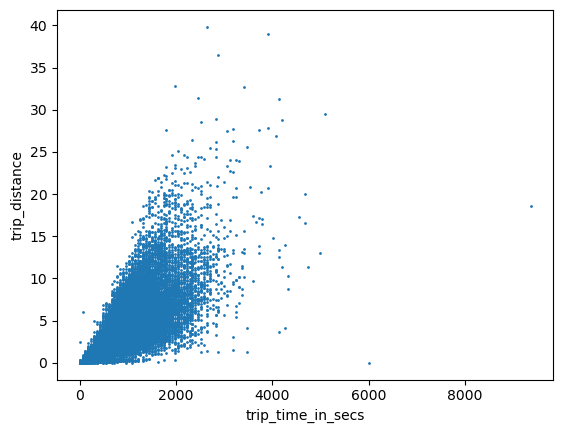

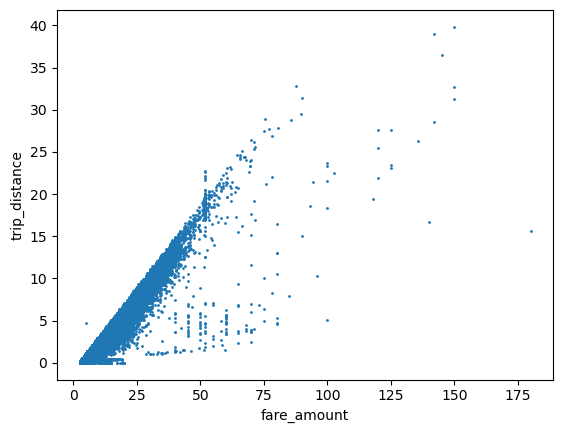

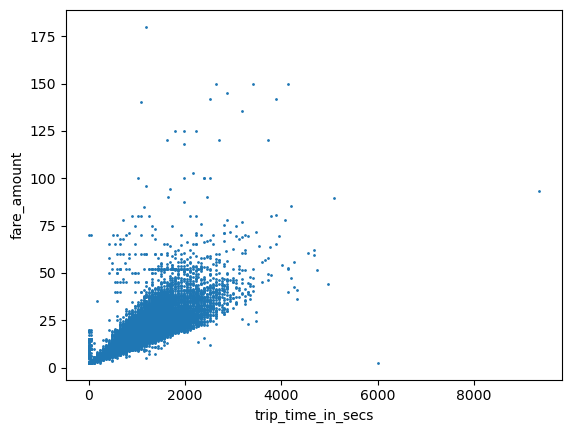

In [8]:
df.plot.scatter(x='trip_time_in_secs',y='trip_distance', s = 1)
df.plot.scatter(x='fare_amount',y='trip_distance', s = 1)
df.plot.scatter(x='trip_time_in_secs',y='fare_amount', s = 1)

<!-- END QUESTION -->

# Q3
Using the cleaned dataset from Q1, we want to find a simple line that correlates two variables: *trip distance* and *fare amount*. Use the **scikit-learn** library to fit a line to the data.

- Provide the regression coefficients of your model
- Write down your linear regression equation. 
- Use your model to predict the fare amount for a 3 miles trip. 


_Type your answer here, replacing this text._

<!-- BEGIN QUESTION -->



In [36]:
from sklearn.linear_model import LinearRegression
trip_d = df["trip_distance"]
fare_a = df["fare_amount"]
my_X = np.vstack((trip_d, )).T
reg = LinearRegression().fit(my_X, fare_a)
print('reg.coef:', reg.coef_[0])
print('reg.intercept:', reg.intercept_)
print('linear regression equation: y =', reg.intercept_ , '+', reg.coef_[0], '* (distance)')
three_mile_trip = reg.intercept_ +  reg.coef_[0] * 3
print('prediction for a 3 mile trip:', three_mile_trip)

reg.coef: 2.8613057461255407
reg.intercept: 3.7480690617317034
linear regression equation: y = 3.7480690617317034 + 2.8613057461255407 * (distance)
prediction for a 3 mile trip: 12.331986300108325


<!-- END QUESTION -->

# Q4
Using the cleaned dataset from Q1, fit a Multiple Linear Regression hyperplane into this data. We are interested to predict *total amount* using the *trip distance* and *travel time*. Use the **Scikit-learn** library.

* Provide the regression coefficients of your model
* Write down your Multiple Linear Regression equation. 
* Use your model to predict the total amount for a 3 miles trip and 6 min travel time. 


_Type your answer here, replacing this text._

<!-- BEGIN QUESTION -->



In [39]:
y = df["total_amount"]
x = df[["trip_distance", "trip_time_in_secs"]]
my_y = np.vstack((y,)).T
reg = LinearRegression().fit(x, my_y)
print('reg.coefs:', reg.coef_[0])
print('reg.intercept:', reg.intercept_)
print('linear regression equation: y =', reg.intercept_[0] , '+', reg.coef_[0][0], '* (distance)', '+', reg.coef_[0][1], '* (time)')
three_m_six_min = reg.intercept_[0] + reg.coef_[0][0] * 3 + reg.coef_[0][1] * (60*6)
print('prediction for a 3 mile and 6 minute trip:', three_m_six_min)



reg.coefs: [2.45081294 0.00536665]
reg.intercept: [3.15025011]
linear regression equation: y = 3.150250105167329 + 2.450812938074102 * (distance) + 0.005366650492357848 * (time)
prediction for a 3 mile and 6 minute trip: 12.434683096638459


<!-- END QUESTION -->

# Q5
Using the cleaned dataset from Q1, implement the gradient descent optimization to find the optimal parameters for our Simple Linear Regression model of task 3.

* Define and set your learning rate (start with a very small number and increase it if your GC works)
* Instantiate all coefficients from zero
* Run a maximum of 400 interations. You can stop if your cost converges with a precision of 0.01 
* Print and visualize the optimization costs 
* Provide the Regression Coefficients of your model after stop or convergence. 

A visualization of the error vs. number of iteratons **is required**.

_Type your answer here, replacing this text._

<!-- BEGIN QUESTION -->



In [56]:
def mse(y, predictions):
    """Calculate mean squared error."""
    MSE = np.square(np.subtract(y,predictions)).mean()
    return MSE


def average_relative_error(y, predictions):
    """Calculate the average relative error for each sample in the 
    dataset. This is the precision score we can use to stop early."""
    mae = np.sum(np.abs(y - predictions)) / len(predictions)
    return mae
    


def d_a(X, y, predictions):
    """Calculate gradient for a (the slope coefficient)."""
    a = (1.0/n) * sum (X*(predictions - y) )
    return a 
    
    

def d_b(y, predictions):
    """Calculate gradient for b (the y-intercept coefficient)."""
    b = (1.0/n) * sum (predictions - y)
    return b
    


In [94]:
# Use the functions above to compute your gradient descent for the up to 400 iterations.
x = df["trip_distance"]
y =  df["fare_amount"]
b_current = 0 
m_current = 0

learningRate = 0.1
num_iteration = 400

precision = 0.01
oldCost=0
n = float(len(y))
xx, costHist = [], [] 
y_prediction = m_current * x + b_current
initCost= (1/n) * sum (( y_prediction - y)**2)

for i in range(num_iteration):
    
    # Calculate the prediction with current regression coefficients. 
    y_prediction = m_current * x + b_current
    
    cost = mse(y,y_prediction)
    
    m_gradient = d_a(x,y,y_prediction)
    b_gradient = d_b(y, y_prediction)
    
    m_current = m_current - learningRate * m_gradient
    b_current = b_current - learningRate * b_gradient
    
    if(average_relative_error(y,y_prediction) <= precision):
        print("Stopped at iteration", i)
        break
    oldCost = cost
    
    xx.append(i)
    costHist.append(cost)
    
    if(i % 1 ==0):
        print("Iteration No.=", i ," m = ", m_current, " b=", b_current, " Cost=", cost) 

print("m = ", m_current, " b=", b_current)
        
    
    
    
    

Iteration No.= 0  m =  6.2078986376992376  b= 1.2663353123490582  Cost= 233.95298543914024
Iteration No.= 1  m =  1.0862747490791618  b= 0.4717740439223952  Cost= 160.54390877669803
Iteration No.= 2  m =  5.2337495578622475  b= 1.3524694170637725  Cost= 111.33604502796312
Iteration No.= 3  m =  1.8012112124527646  b= 0.8528210487323226  Cost= 78.32837196988505
Iteration No.= 4  m =  4.5706280338302925  b= 1.4726511280616417  Cost= 56.16695733885485
Iteration No.= 5  m =  2.2687044773766982  b= 1.1676006331484339  Cost= 41.269021673446765
Iteration No.= 6  m =  4.116571932227793  b= 1.610290751315894  Cost= 31.236867663077202
Iteration No.= 7  m =  2.5715635217718082  b= 1.43295153247995  Cost= 24.46575173781814
Iteration No.= 8  m =  3.803279013870326  b= 1.7547414473351202  Cost= 19.881517535755464
Iteration No.= 9  m =  2.7651150267348985  b= 1.6605732687966028  Cost= 16.765049872450845
Iteration No.= 10  m =  3.5849749523203758  b= 1.8992940452833418  Cost= 14.6348182715029
Iteratio

Iteration No.= 103  m =  2.8668686568785  b= 3.717396738369055  Cost= 8.863364855214112
Iteration No.= 104  m =  2.866626731917353  b= 3.7187306736034635  Cost= 8.863325552062273
Iteration No.= 105  m =  2.8663953189357474  b= 3.720006594527337  Cost= 8.863289593148783
Iteration No.= 106  m =  2.866173977671614  b= 3.7212270272389967  Cost= 8.863256693918114
Iteration No.= 107  m =  2.865962256282146  b= 3.7223943824042127  Cost= 8.863226594027617
Iteration No.= 108  m =  2.8657597477093746  b= 3.723510970407796  Cost= 8.863199055285406
Iteration No.= 109  m =  2.8655660420391675  b= 3.724578997427591  Cost= 8.863173859768636
Iteration No.= 110  m =  2.8653807640011526  b= 3.725600576745099  Cost= 8.863150808095181
Iteration No.= 111  m =  2.8652035408898957  b= 3.726577727240775  Cost= 8.863129717849981
Iteration No.= 112  m =  2.865034027460441  b= 3.727512382034949  Cost= 8.863110422137732
Iteration No.= 113  m =  2.8648718842790393  b= 3.728406388507674  Cost= 8.86309276826515
Iter

Iteration No.= 207  m =  2.8613603243759194  b= 3.747768132789531  Cost= 8.862902989526432
Iteration No.= 208  m =  2.8613579507767697  b= 3.747781220139815  Cost= 8.862902985743057
Iteration No.= 209  m =  2.86135568040506  b= 3.747793738323385  Cost= 8.862902982281861
Iteration No.= 210  m =  2.861353508771443  b= 3.7478057120932062  Cost= 8.862902979114892
Iteration No.= 211  m =  2.8613514315818143  b= 3.747817165125744  Cost= 8.862902976217832
Iteration No.= 212  m =  2.861349444728823  b= 3.7478281200677777  Cost= 8.862902973566722
Iteration No.= 213  m =  2.8613475442837406  b= 3.747838598581181  Cost= 8.862902971141537
Iteration No.= 214  m =  2.8613457264887043  b= 3.7478486213857565  Cost= 8.862902968922567
Iteration No.= 215  m =  2.8613439877492737  b= 3.7478582083002068  Cost= 8.862902966892612
Iteration No.= 216  m =  2.861342324627338  b= 3.747867378281322  Cost= 8.862902965035122
Iteration No.= 217  m =  2.8613407338342993  b= 3.747876149461464  Cost= 8.862902963335879


Iteration No.= 303  m =  2.8613065103486877  b= 3.7480648480227408  Cost= 8.862902945072538
Iteration No.= 304  m =  2.8613064771127474  b= 3.7480650312762513  Cost= 8.862902945071959
Iteration No.= 305  m =  2.8613064453222354  b= 3.748065206560097  Cost= 8.862902945071149
Iteration No.= 306  m =  2.861306414914284  b= 3.7480653742208765  Cost= 8.862902945070601
Iteration No.= 307  m =  2.861306385828774  b= 3.748065534590117  Cost= 8.862902945070019
Iteration No.= 308  m =  2.8613063580081826  b= 3.7480656879849246  Cost= 8.862902945069427
Iteration No.= 309  m =  2.86130633139751  b= 3.748065834708618  Cost= 8.862902945069116
Iteration No.= 310  m =  2.861306305944125  b= 3.748065975051322  Cost= 8.86290294506875
Iteration No.= 311  m =  2.861306281597709  b= 3.748066109290545  Cost= 8.862902945068077
Iteration No.= 312  m =  2.8613062583101114  b= 3.748066237691726  Cost= 8.862902945068004
Iteration No.= 313  m =  2.8613062360352894  b= 3.7480663605087607  Cost= 8.862902945067678
I

Text(0, 0.5, 'cost')

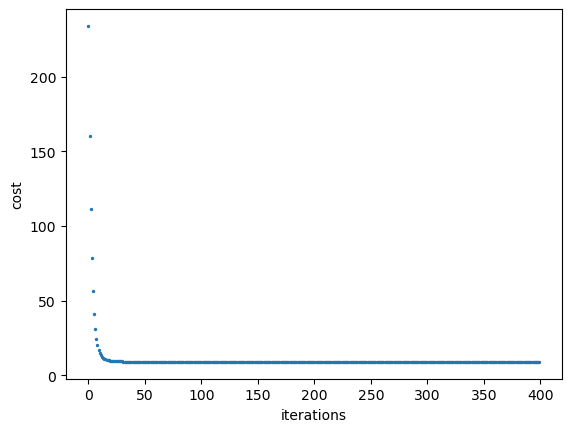

In [95]:
# Visualize optimization costs over the iterations

plt.scatter(xx,costHist, s = 2)
plt.xlabel("iterations")
plt.ylabel("cost")


<!-- END QUESTION -->

